<a href="https://colab.research.google.com/github/Nallasamy5325/Imarticus-project/blob/main/covid_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [01:50<00:00, 19.2MB/s]
100% 2.06G/2.06G [01:50<00:00, 19.9MB/s]


In [ ]:
!unzip chest-xray-covid19-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D, Flatten, MaxPooling2D,Activation
from keras.optimizers import SGD,Adam
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [ ]:
img_width, img_height = 150,150
train_data_dir = r"/content/Data/train"
validation_data_dir=r"/content/Data/test"
nb_train_samples =100
nb_validation_samples =100
epochs =20
batch_size= 32

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator ( rescale=1. /255)


In [ ]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), class_mode='categorical', batch_size=batch_size,classes=['COVID19','NORMAL','PNEUMONIA'])

Found 5144 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
test_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height),class_mode='categorical', batch_size=batch_size)

Found 1288 images belonging to 3 classes.


In [ ]:
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
model=Sequential()

#BLOCK-1
model.add(Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-2
model.add(Conv2D(128,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-3
model.add(Conv2D(256,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#CLASSIFICATION
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))



model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
)

<ipython-input-20-9f4ca7ca4647>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(


Epoch 1/20
161/161 [==============================] - 108s 575ms/step - loss: 0.7166 - accuracy: 0.7047 - val_loss: 0.2981 - val_accuracy: 0.8952
Epoch 2/20
161/161 [==============================] - 90s 559ms/step - loss: 0.3919 - accuracy: 0.8476 - val_loss: 0.2495 - val_accuracy: 0.9061
Epoch 3/20
161/161 [==============================] - 91s 565ms/step - loss: 0.3198 - accuracy: 0.8812 - val_loss: 0.3306 - val_accuracy: 0.8734
Epoch 4/20
161/161 [==============================] - 96s 600ms/step - loss: 0.3012 - accuracy: 0.8874 - val_loss: 0.1829 - val_accuracy: 0.9379
Epoch 5/20
161/161 [==============================] - 92s 569ms/step - loss: 0.2601 - accuracy: 0.9007 - val_loss: 0.1973 - val_accuracy: 0.9317
Epoch 6/20
161/161 [==============================] - 91s 564ms/step - loss: 0.2414 - accuracy: 0.9119 - val_loss: 0.1926 - val_accuracy: 0.9340
Epoch 7/20
161/161 [==============================] - 90s 561ms/step - loss: 0.2179 - accuracy: 0.9182 - val_loss: 0.2273 - val_a

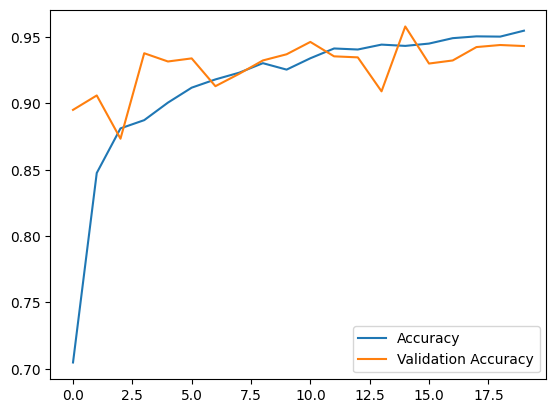

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

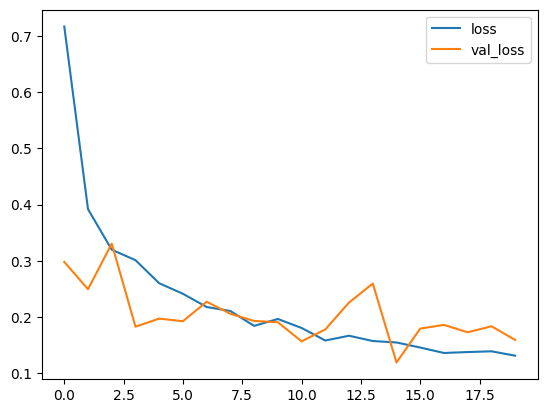

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
def pred(a):
  img_pred = image.load_img(a,target_size=(150,150))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model.predict(img_pred)

  print(result)

  if result[0][0]==1:
    prediction ="COVID-19"
  elif result[0][1]==1:
    prediction ="NORMAL"
  else:
    prediction="PNEUMONIA"

  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

  print('Prediction: ',prediction)

1/1 [==============================] - 0s 435ms/step
[[0. 1. 0.]]


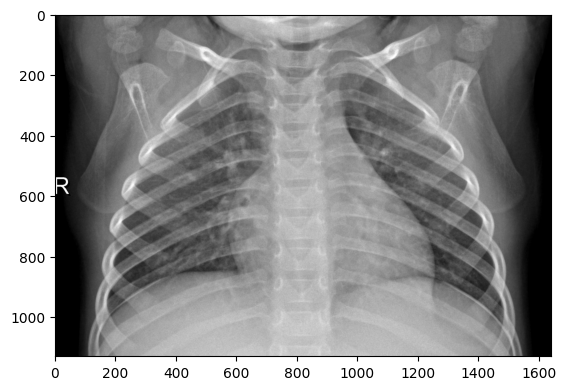

In [ ]:
pred('/content/Data/test/NORMAL/NORMAL(1447).jpg')